In [1]:
import Merge_Cartesian as MC
from decimal import *
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from math import floor
from typing import List
import math

%matplotlib widget

# Sweep Over Input Variables

$T_L$ x $T_C$ = constant

In [2]:
def sweep_time_interval( TL_x_TC_constant : str,starting_TL: str, ending_TL : str, number_of_intervals : int, **kwargs):

    multiple_K = Decimal(TL_x_TC_constant)
    starting_TL = Decimal(starting_TL)
    ending_TL = Decimal(ending_TL)

    number_of_intervals = int(number_of_intervals)
    
    #Default Values
    kwarg_options = dict([
        ('L_impedance','100'), ('C_impedance','1'),('number_periods','1'),('is_Buck',False),('Load_impedance','12'),('excitation_voltage','1')])
    
    #Set Kwargs
    for key, item in kwargs.items():
        if(kwarg_options.get(key) is None):
            raise Exception(f"No setting found for {key}, here are the possible options: \n{kwarg_options}")
        else:
            kwarg_options[key] = item

    L_impedance = kwarg_options['L_impedance']
    C_impedance = kwarg_options['C_impedance']
    number_periods = kwarg_options['number_periods']

    data_inputs : List[MC.Data_Input_Storage]= []
    data_outputs : List[MC.Data_Output_Storage]= []
    data_outputs_merged : List[MC.Data_Output_Storage]= []
    data_outputs_ordered : List[MC.Data_Output_Storage_Ordered]= []
    labels = []

                    #   VOLTAGE  , PERIODS       , BUCK , LOAD
    Circuit_List =   [kwarg_options['excitation_voltage'], kwarg_options['number_periods'], kwarg_options['is_Buck'], kwarg_options['Load_impedance']]
    
    interval = (ending_TL - starting_TL) / (number_of_intervals-1)


    for i in range(number_of_intervals):
        TL = starting_TL + i*interval
        TC = multiple_K/TL
        
                            #  IMPEDANCE     ,TIME    ,LENGTH
        Inductor_List =    [L_impedance   ,str(TL)  ,'1']
        Capacitor_List =   [C_impedance   ,str(TC)  ,'1']

        (data_input,
        data_output,
        data_output_merged, 
        data_output_ordered) = MC.Full_Cycle(Inductor_List,Capacitor_List, Circuit_List,False)
        
        data_inputs.append(data_input)
        data_outputs.append(data_output)
        data_outputs_merged.append(data_output_merged)
        data_outputs_ordered.append(data_output_ordered)
        
        TL_TC_label = f"TL = {TL} TC = {TC}"
        KL_KC_label = f"KL = {data_input.Inductor_LCM_Factor} KC = {data_input.Capacitor_LCM_Factor}"
        ZL_ZC_label = f"ZL = {kwarg_options['L_impedance']} ZC = {kwarg_options['C_impedance']}"
        L_C_label = f"L = {data_input.Inductor_Total_Inductance}H C = {data_input.Capacitor_Total_Capacitance}F"
        
        labels.append(dict([
        ('TL_TC',TL_TC_label), 
        ('KL_KC',KL_KC_label),
        ('ZL_ZC',ZL_ZC_label),
        ('L_C',L_C_label)]))
        
    return(data_inputs,
           data_outputs,
           data_outputs_merged,
           data_outputs_ordered,
           labels)

In [3]:
def sweep_time_factors_of_integer(TL_x_TC_constant : int, **kwargs):
    #Default Values
    kwarg_options = dict([
        ('L_impedance','100'), ('C_impedance','1'),('number_periods','1'),('is_Buck',False),('Load_impedance','12'),('excitation_voltage','1')])
    
    #Set Kwargs
    for key, item in kwargs.items():
        if(kwarg_options.get(key) is None):
            raise Exception(f"No setting found for {key}, here are the possible options: \n{kwarg_options}")
        else:
            kwarg_options[key] = item
            
    data_inputs : List[MC.Data_Input_Storage]= []
    data_outputs : List[MC.Data_Output_Storage]= []
    data_outputs_merged : List[MC.Data_Output_Storage]= []
    data_outputs_ordered : List[MC.Data_Output_Storage_Ordered]= []
    labels = []

    L_impedance = kwarg_options['L_impedance']
    C_impedance = kwarg_options['C_impedance']
    number_periods = kwarg_options['number_periods']
    
    Circuit_List =   [kwarg_options['excitation_voltage'], kwarg_options['number_periods'], kwarg_options['is_Buck'], kwarg_options['Load_impedance']]
    
    for i in range(1,TL_x_TC_constant +1):
        # is a factor
        if TL_x_TC_constant%i == 0:
            TL = i
            TC = int(TL_x_TC_constant/i)
            
                                        #  IMPEDANCE     ,TIME    ,LENGTH
            Inductor_List =    [L_impedance   ,str(TL)  ,'1']
            Capacitor_List =   [C_impedance   ,str(TC)  ,'1']
            
            (data_input,
            data_output,
            data_output_merged, 
            data_output_ordered) = MC.Full_Cycle(Inductor_List,Capacitor_List, Circuit_List,False)
            
            data_inputs.append(data_input)
            data_outputs.append(data_output)
            data_outputs_merged.append(data_output_merged)
            data_outputs_ordered.append(data_output_ordered)
            TL_TC_label = f"TL = {TL} TC = {TC}"
            KL_KC_label = f"KL = {data_input.Inductor_LCM_Factor} KC = {data_input.Capacitor_LCM_Factor}"
            ZL_ZC_label = f"ZL = {kwarg_options['L_impedance']} ZC = {kwarg_options['C_impedance']}"
            L_C_label = f"L = {data_input.Inductor_Total_Inductance}H C = {data_input.Capacitor_Total_Capacitance}F"
            
            labels.append(dict([
            ('TL_TC',TL_TC_label), 
            ('KL_KC',KL_KC_label),
            ('ZL_ZC',ZL_ZC_label),
            ('L_C',L_C_label)]))
                
    return(data_inputs,
        data_outputs,
        data_outputs_merged,
        data_outputs_ordered,
        labels)

In [4]:
def sweep_time_steps(TL_x_TC_constant : str,starting_TL: str, step_size :str, number_of_steps :int,**kwargs):
    
    #Possible Kwargs
    kwarg_options = dict([
        ('L_impedance','100'), ('C_impedance','1'),('number_periods','1'),('is_Buck',False),('Load_impedance','12'),('excitation_voltage','1')])
    #Set Kwargs
    for key, item in kwargs.items():
        if(kwarg_options.get(key) is None):
            raise Exception(f"No setting found for {key}, here are the possible options: \n{kwarg_options}")
        else:
            kwarg_options[key] = item
            
    TL_x_TC_constant = Decimal(TL_x_TC_constant)
    starting_TL = Decimal(starting_TL)
    step_size = Decimal(step_size)
    
    data_inputs : List[MC.Data_Input_Storage]= []
    data_outputs : List[MC.Data_Output_Storage]= []
    data_outputs_merged : List[MC.Data_Output_Storage]= []
    data_outputs_ordered : List[MC.Data_Output_Storage_Ordered]= []
    labels = []
    
    Circuit_List =   [kwarg_options['excitation_voltage'], kwarg_options['number_periods'], kwarg_options['is_Buck'], kwarg_options['Load_impedance']]
    
    for i in range(number_of_steps+1):
        
        TL = starting_TL + i*step_size
        TC = TL_x_TC_constant/TL
        
        Inductor_List =    [kwarg_options['L_impedance' ]  ,str(TL)  ,'1']
        Capacitor_List =   [kwarg_options['C_impedance']   ,str(TC)  ,'1']
        
        (data_input,
        data_output,
        data_output_merged, 
        data_output_ordered) = MC.Full_Cycle(Inductor_List,Capacitor_List, Circuit_List,False)
        
        data_inputs.append(data_input)
        data_outputs.append(data_output)
        data_outputs_merged.append(data_output_merged)
        data_outputs_ordered.append(data_output_ordered)
        
        TL_TC_label = f"TL = {TL} TC = {TC}"
        KL_KC_label = f"KL = {data_input.Inductor_LCM_Factor} KC = {data_input.Capacitor_LCM_Factor}"
        ZL_ZC_label = f"ZL = {kwarg_options['L_impedance']} ZC = {kwarg_options['C_impedance']}"
        L_C_label = f"L = {data_input.Inductor_Total_Inductance}H C = {data_input.Capacitor_Total_Capacitance}F"
        
        labels.append(dict([
        ('TL_TC',TL_TC_label), 
        ('KL_KC',KL_KC_label),
        ('ZL_ZC',ZL_ZC_label),
        ('L_C',L_C_label)]))

    return(data_inputs,
        data_outputs,
        data_outputs_merged,
        data_outputs_ordered,
        labels)

In [5]:
def sweep_constant_inductance_step_impedance(L_constant : str,starting_L_impedance : str,impedance_step_size :str, number_of_steps :int,**kwargs):
    
    #Possible Kwargs
    kwarg_options = dict([
        ('C_impedance','1'), ('C_time','1'),('number_periods','1'),('is_Buck',False),('Load_impedance','12'),('excitation_voltage','1')])
    #Set Kwargs
    for key, item in kwargs.items():
        if(kwarg_options.get(key) is None):
            raise Exception(f"No setting found for {key}, here are the possible options: \n{kwarg_options}")
        else:
            kwarg_options[key] = item
            
    L_constant = Decimal(L_constant)
    starting_L_impedance = Decimal(starting_L_impedance)
    impedance_step_size = Decimal(impedance_step_size)
    
    data_inputs : List[MC.Data_Input_Storage]= []
    data_outputs : List[MC.Data_Output_Storage]= []
    data_outputs_merged : List[MC.Data_Output_Storage]= []
    data_outputs_ordered : List[MC.Data_Output_Storage_Ordered]= []
    labels = [] # [TL,TC]
    labels_KL_KC = [] # [KL,KC]

    
    Circuit_List =   [kwarg_options['excitation_voltage'], kwarg_options['number_periods'], kwarg_options['is_Buck'], kwarg_options['Load_impedance']]
    
    for i in range(number_of_steps):
        ZL = starting_L_impedance + i*impedance_step_size
        TL = L_constant/ZL
        
        Inductor_List =    [ZL  ,str(TL)  ,'1']
        Capacitor_List =   [kwarg_options['C_impedance']   ,kwarg_options['C_time']  ,'1']

        (data_input,
        data_output,
        data_output_merged, 
        data_output_ordered) = MC.Full_Cycle(Inductor_List,Capacitor_List, Circuit_List,False)
        
        data_inputs.append(data_input)
        data_outputs.append(data_output)
        data_outputs_merged.append(data_output_merged)
        data_outputs_ordered.append(data_output_ordered)
        TL_TC_label = f"TL = {TL} TC = {kwarg_options['C_time']}"
        KL_KC_label = f"KL = {data_input.Inductor_LCM_Factor} KC = {data_input.Capacitor_LCM_Factor}"
        ZL_ZC_label = f"ZL = {ZL} ZC = {kwarg_options['C_impedance']}"
        L_C_label = f"L = {data_input.Inductor_Total_Inductance}H C = {data_input.Capacitor_Total_Capacitance}F"
        
        labels.append(dict([
        ('TL_TC',TL_TC_label), 
        ('KL_KC',KL_KC_label),
        ('ZL_ZC',ZL_ZC_label),
        ('L_C',L_C_label)]))

    return(data_inputs,
    data_outputs,
    data_outputs_merged,
    data_outputs_ordered,
    labels)

In [6]:
# ## SWEEP INTERVAL
# number_of_intervals = 6

# (data_inputs,
# data_outputs,
# data_outputs_merged,
# data_outputs_ordered,
# labels) = sweep_time_interval('12','0.5','12.5',number_of_intervals)

# ## SWEEP INTEGER FACTORS
# (data_inputs,
# data_outputs,
# data_outputs_merged,
# data_outputs_ordered,
# labels) =sweep_time_factors_of_integer(8,L_impedance = '500')

## SWEEP TIME STEPS
(data_inputs,
data_outputs,
data_outputs_merged,
data_outputs_ordered,
labels) =sweep_time_steps('0.2','0.05','0.05',4)

## SWEEP INDUCTANCE
# (data_inputs,
# data_outputs,
# data_outputs_merged,
# data_outputs_ordered,
# labels) =sweep_constant_inductance_step_impedance('400','100','200',4)

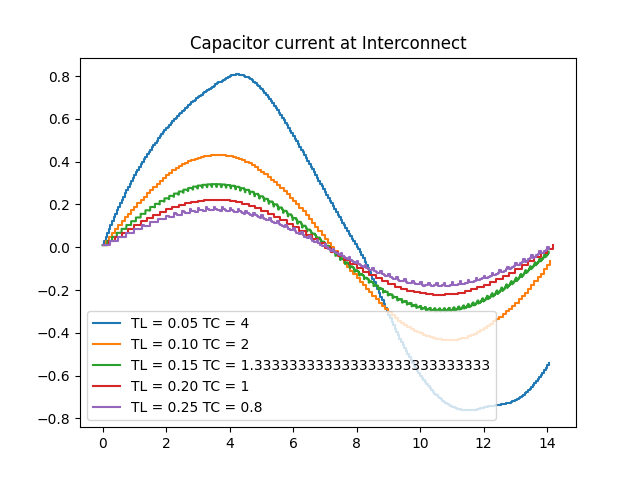

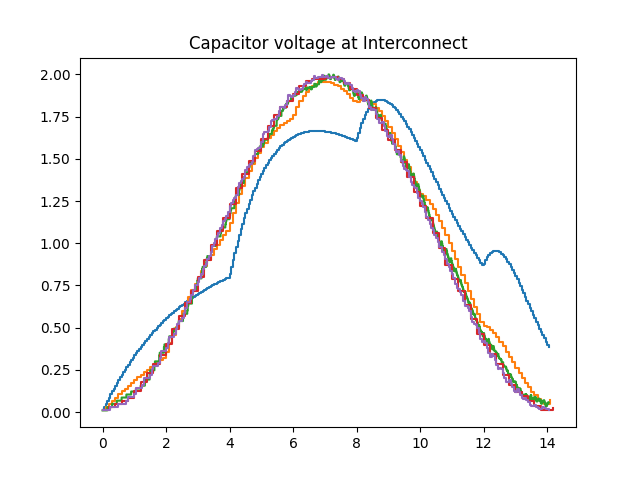

In [7]:
fig, ax = plt.subplots()

for data_ouput_ordered,label in zip(data_outputs_ordered,labels) :
    MC.plot_time_interconnect(data_ouput_ordered,ax,'current capacitor',True)
    
# ax.legend([x['KL_KC'] for x in labels])
# ax.legend([x['ZL_ZC'] for x in labels])
ax.legend([x['TL_TC'] for x in labels])
# ax.legend([x['L_C'] for x in labels])

fig_voltage, ax_voltage = plt.subplots()

for data_ouput_ordered,label in zip(data_outputs_ordered[:],labels[:]) :
    MC.plot_time_interconnect(data_ouput_ordered,ax_voltage,'voltage capacitor',True)
    
# ax_voltage.legend(labels[:])

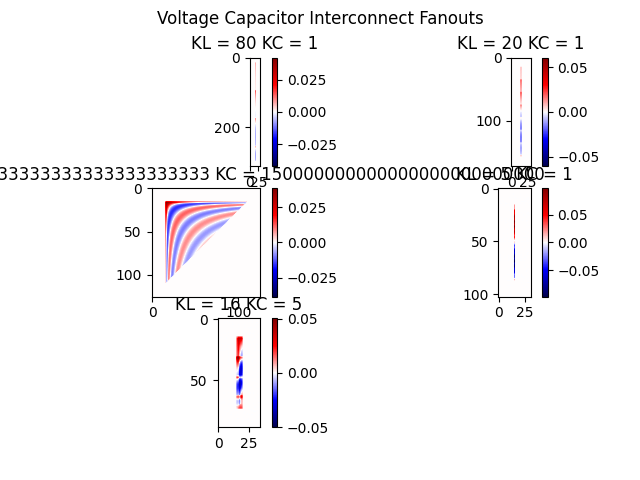

In [8]:
fig_fanouts = plt.figure()

fig_fanouts.suptitle('Voltage Capacitor Interconnect Fanouts')

start_num = 0
finish_num = len(labels)

number_of_items = len(labels[start_num:finish_num])
i =1
for data_input,data_output_merged, label in zip(data_inputs[start_num:finish_num],data_outputs_merged[start_num:finish_num],labels[start_num:finish_num]):
    if number_of_items%2 == 0:
        ax_fanout = fig_fanouts.add_subplot(number_of_items/2,2,i)
    else:
        ax_fanout = fig_fanouts.add_subplot(floor(number_of_items/2)+1,2,i)
    KL = data_input.Inductor_LCM_Factor
    KC = data_input.Capacitor_LCM_Factor
  
    MC.plot_fanout_seismic(data_output_merged.Voltage_Interconnect_Capacitor,ax_fanout,label["KL_KC"])
    i += 1

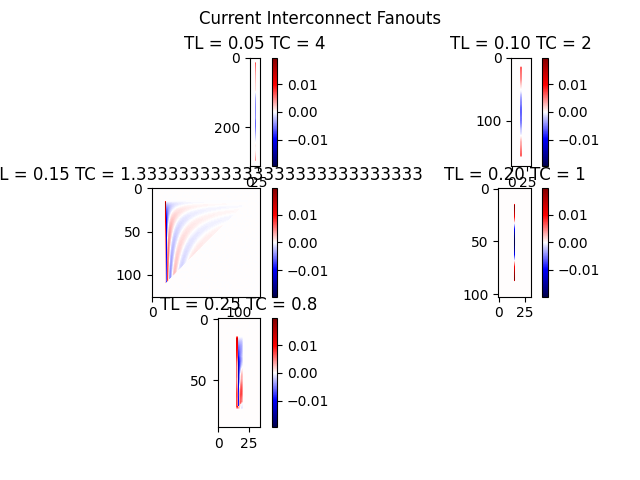

In [9]:
fig_fanouts_current = plt.figure()

fig_fanouts_current.suptitle('Current Interconnect Fanouts')

start_num = 0
finish_num = len(labels)

number_of_items = len(labels[start_num:finish_num])
i =1
for data_input,data_output_merged, label in zip(data_inputs[start_num:finish_num],data_outputs_merged[start_num:finish_num],labels[start_num:finish_num]):
    if number_of_items%2 == 0:
        ax_fanout = fig_fanouts_current.add_subplot(number_of_items/2,2,i)
    else:
        ax_fanout = fig_fanouts_current.add_subplot(floor(number_of_items/2)+1,2,i)
    KL = data_input.Inductor_LCM_Factor
    KC = data_input.Capacitor_LCM_Factor
  
    MC.plot_fanout_seismic(data_output_merged.Current_Interconnect_Capacitor,ax_fanout,label["TL_TC"])
    i += 1

GridspecLayout(children=(Button(description='step backward', layout=Layout(grid_area='widget001', width='auto'…

FloatSlider(value=0.0, layout=Layout(width='auto'), max=13.049629462082377)

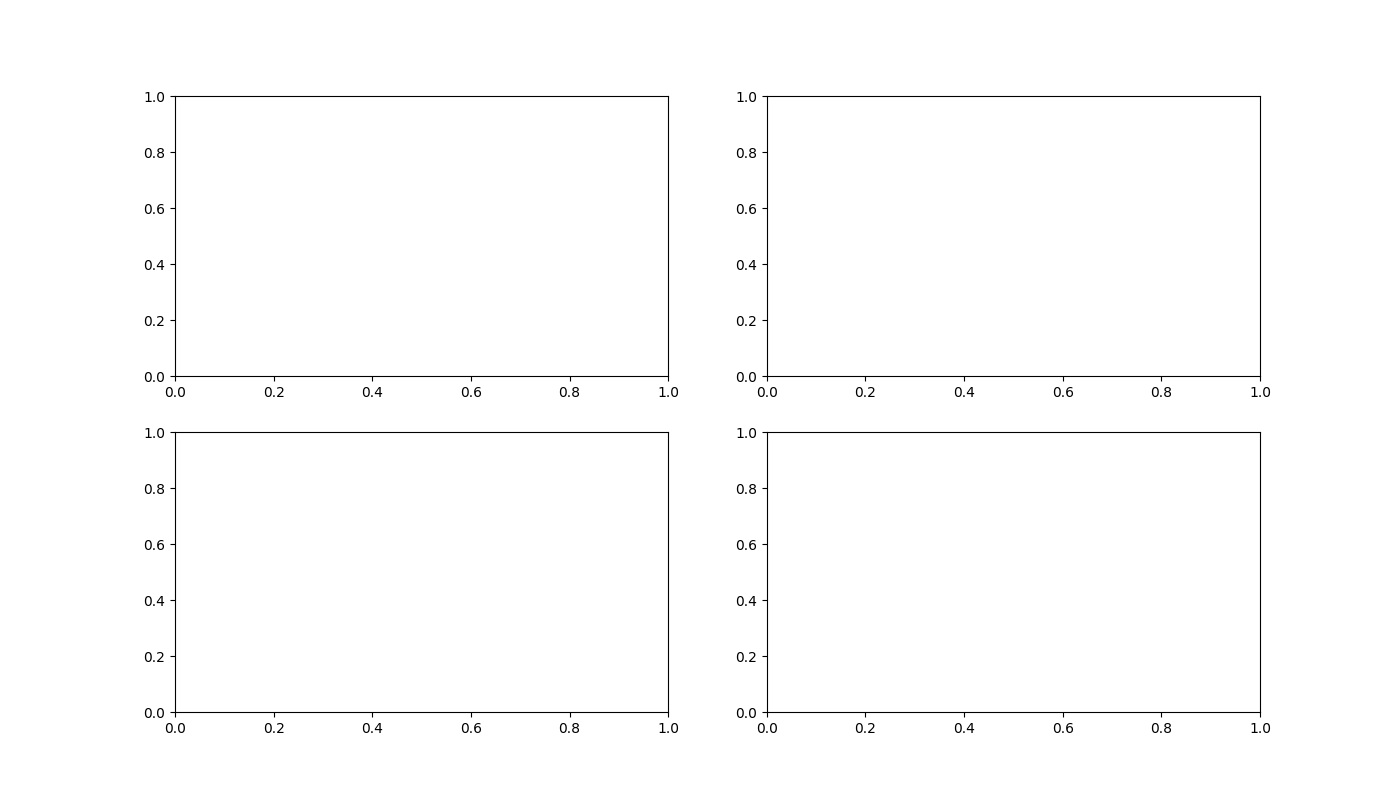

In [10]:
index = 1

MC.spatial_interconnect_investigator_ui(data_inputs[index],data_outputs_merged[index],data_outputs_ordered[index])

In [11]:
# MC.save_spatial_interconnect(data_inputs[index],data_outputs_merged[index],data_outputs_ordered[index])